In [66]:
import pandas as pdimport numpy as np

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/spam-emails")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Usuario1\.cache\kagglehub\datasets\abdallahwagih\spam-emails\versions\1


In [68]:
import os

dataset_path = r"C:\Users\Usuario1\.cache\kagglehub\datasets\abdallahwagih\spam-emails\versions\1"
print(os.listdir(dataset_path))


['spam.csv']


In [69]:
df = pd.read_csv(os.path.join(dataset_path, "spam.csv"))
print(df.head())  # Muestra las primeras filas


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [70]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [71]:
print(df["Category"].value_counts())


Category
ham     4825
spam     747
Name: count, dtype: int64


In [72]:
df["Category"] = df["Category"].map({"ham": 0, "spam": 1})

In [73]:
print(df.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [74]:
import re #sirve para trabajar con palabras iiregulares en phyton
import nltk #sirve para el procesamiento de texto, Count vectorizer: Pasar palabras a numeros
from nltk.corpus import stopwords

In [75]:
nltk.download("stopwords") #descargo palabras irrelevantes en ingles

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
stop_words = set(stopwords.words("english")) #obtengo la lista de palabras irrelevantes convirtie4ndolas en un conjunto

In [77]:
def clean_text(text): 
    text = text.lower() #convertir a minusculas
    text = re.sub(r"[^\w\s]","",text)  # Elimino signos de puntuación
    text = " ".join(word for word in text.split() if word not in stop_words)   # Quitar stopwords
    return text

In [78]:
df["Cleaned_Message"] = df["Message"].apply(clean_text)

In [79]:
print(df[["Message", "Cleaned_Message"]].head())

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     Cleaned_Message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de Spam y Ham
category_counts = df['Category'].value_counts()

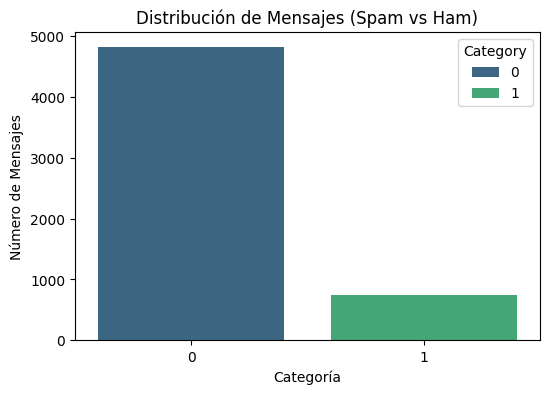

In [81]:
#Distribucion de las categorias (SPAM VS HAM)
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis')
plt.title("Distribución de Mensajes (Spam vs Ham)")
plt.xlabel("Categoría")
plt.ylabel("Número de Mensajes")
plt.show()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # max_features limita el número de características a usar

In [83]:
X = tfidf_vectorizer.fit_transform(df['Cleaned_Message']) # X es la matriz de características (el resultado de TF-IDF)
print(tfidf_vectorizer.get_feature_names_out()[:10])

['01223585334' '020603' '0207' '02073162414' '020903' '021' '0578'
 '07123456789' '07734396839' '07742676969']


In [84]:
from sklearn.model_selection import train_test_split 

In [85]:
y = df['Category'] # y es la columna con las etiquetas (spam/ham)

In [86]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) # Dividimos en entrenamiento (80%) y test (20%)

In [87]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Ahora dividimos el conjunto 'test' en validación (50%) y prueba (50%)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [89]:
# Crear el modelo 
model = LogisticRegression()

In [90]:
model.fit(X_train, y_train) # Entrenar el modelo con los datos de entrenamiento

LogisticRegression()

In [91]:
y_val_pred = model.predict(X_val)
report_original = classification_report(y_val, y_val_pred, output_dict=True)


In [92]:
# Evaluar el modelo en el conjunto de validación
print("Evaluación en conjunto de validación:")
print(classification_report(y_val, y_val_pred))

Evaluación en conjunto de validación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       485
           1       0.98      0.69      0.81        72

    accuracy                           0.96       557
   macro avg       0.97      0.85      0.89       557
weighted avg       0.96      0.96      0.96       557



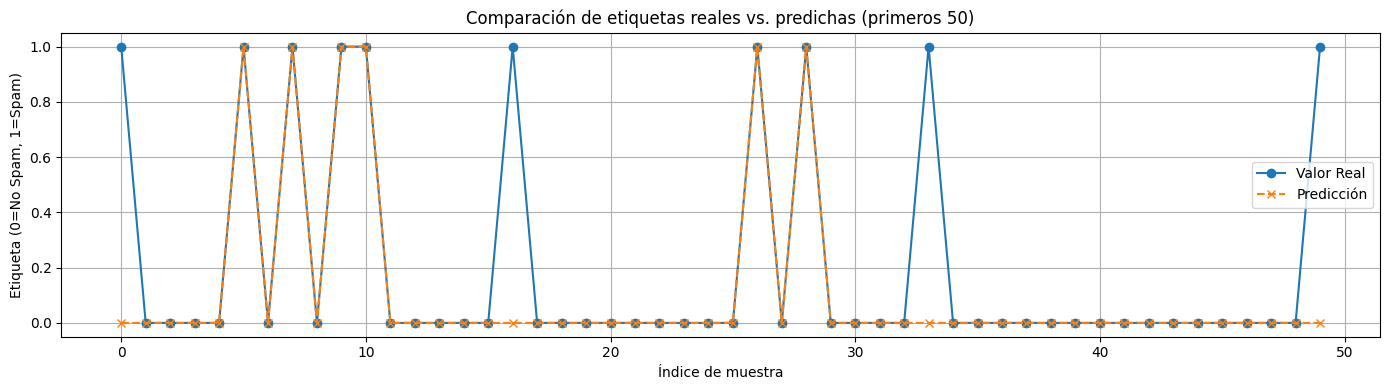

In [102]:
# Visualizamos los primeros 50 valores reales vs predichos
plt.figure(figsize=(14, 4))

# Línea sólida para los valores reales
plt.plot(np.arange(50), y_val[:50], label='Valor Real', marker='o', linestyle='solid')

# Línea punteada para las predicciones
plt.plot(np.arange(50), y_val_pred[:50], label='Predicción', marker='x', linestyle='dashed')

plt.title("Comparación de etiquetas reales vs. predichas (primeros 50)")
plt.xlabel("Índice de muestra")
plt.ylabel("Etiqueta (0=No Spam, 1=Spam)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [94]:
# Crear el objeto oversampler
ros = RandomOverSampler(random_state=42)

# Aplicar oversampling al conjunto de entrenamiento
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
from collections import Counter
print("Distribución de clases después del oversampling:", Counter(y_train_balanced))

Distribución de clases después del oversampling: Counter({1: 3859, 0: 3859})


In [95]:
# Entrenar con los datos balanceados
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

In [96]:
y_val_pred_balanced = model_balanced.predict(X_val)
print("Evaluación con datos balanceados:")
print(classification_report(y_val, y_val_pred_balanced))

Evaluación con datos balanceados:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       485
           1       0.91      0.88      0.89        72

    accuracy                           0.97       557
   macro avg       0.95      0.93      0.94       557
weighted avg       0.97      0.97      0.97       557



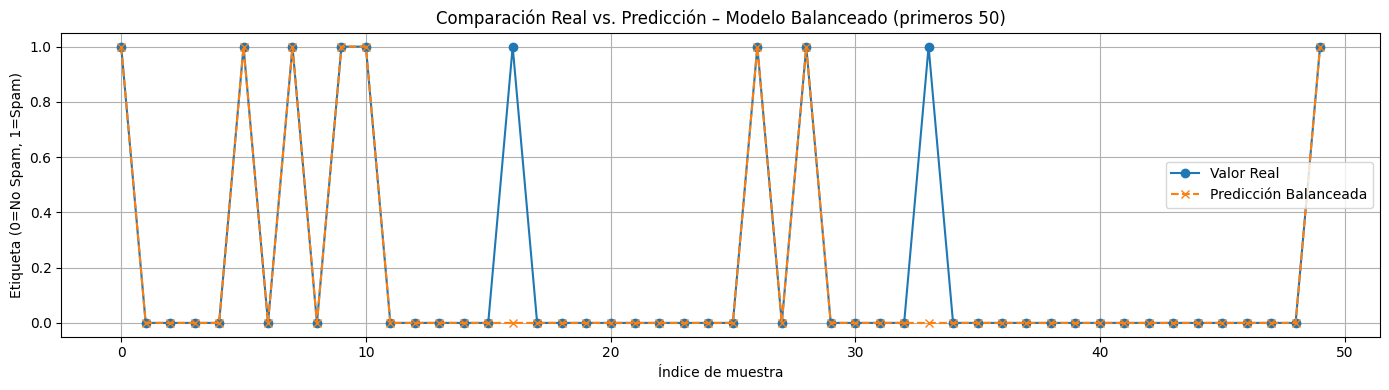

In [103]:
plt.figure(figsize=(14, 4))

# Línea sólida para los valores reales
plt.plot(np.arange(50), y_val[:50], label='Valor Real', marker='o', linestyle='solid')

# Línea punteada para las predicciones balanceadas
plt.plot(np.arange(50), y_val_pred_balanced[:50], label='Predicción Balanceada', marker='x', linestyle='dashed')

plt.title("Comparación Real vs. Predicción – Modelo Balanceado (primeros 50)")
plt.xlabel("Índice de muestra")
plt.ylabel("Etiqueta (0=No Spam, 1=Spam)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# Predicción sobre el conjunto de prueba
y_test_pred = model_balanced.predict(X_test)

In [98]:
# Reporte de métricas finales
print("📊 Evaluación final en conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

📊 Evaluación final en conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       481
           1       0.94      0.97      0.96        77

    accuracy                           0.99       558
   macro avg       0.97      0.98      0.97       558
weighted avg       0.99      0.99      0.99       558



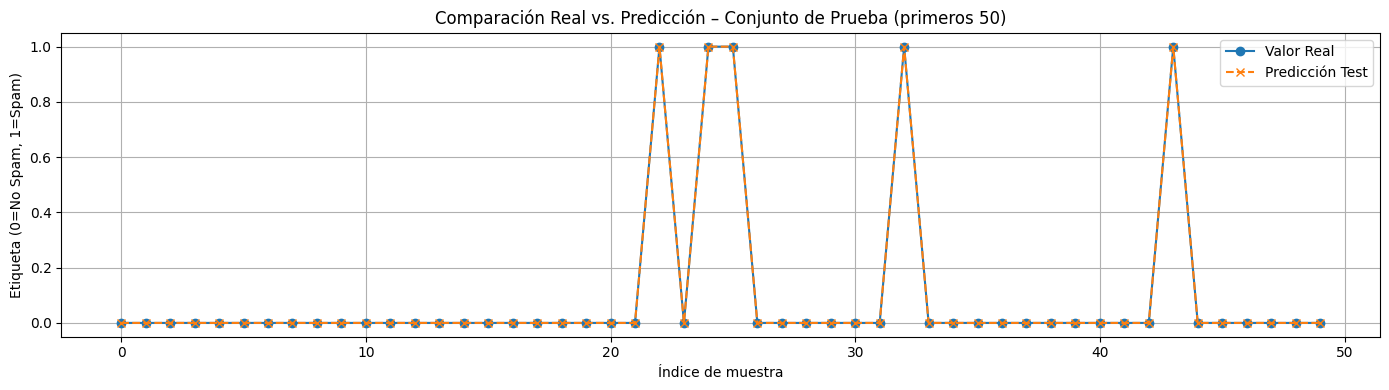

In [104]:

# Mostrar los primeros 50 ejemplos del test
plt.figure(figsize=(14, 4))

# Línea sólida para los valores reales
plt.plot(np.arange(50), y_test[:50], label='Valor Real', marker='o', linestyle='solid')

# Línea punteada para las predicciones
plt.plot(np.arange(50), y_test_pred[:50], label='Predicción Test', marker='x', linestyle='dashed')

plt.title("Comparación Real vs. Predicción – Conjunto de Prueba (primeros 50)")
plt.xlabel("Índice de muestra")
plt.ylabel("Etiqueta (0=No Spam, 1=Spam)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()